In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

# --- 1. 환경 설정 및 DB 연결 ---

# .env 파일에서 환경 변수를 불러옵니다.
# 노트북 파일 위치 기준으로 상위 폴더의 .env 파일을 찾습니다.
dotenv_path = os.path.join(os.path.dirname(os.getcwd()), '.env')
load_dotenv(dotenv_path=dotenv_path)

DATABASE_URL = os.getenv("DATABASE_URL_HOST")
DB_SCHEMA = os.getenv("DB_SCHEMA", "public")

if not DATABASE_URL:
    raise ValueError("DATABASE_URL_HOST 환경 변수가 설정되지 않았습니다.")

# 데이터베이스 연결 엔진 생성
engine = create_engine(DATABASE_URL)

print("✅ 데이터베이스 연결 성공!")

# --- 2. 데이터 불러오기 ---

table_name = "raw_apt_trade"
query = f'SELECT * FROM {DB_SCHEMA}."{table_name}"'

print(f"\n>> 테이블 '{table_name}'에서 데이터 전체를 불러옵니다...")

try:
    with engine.connect() as connection:
        df = pd.read_sql(query, connection)
except Exception as e:
    print(f"❌ 데이터 불러오기 실패: {e}")
    df = pd.DataFrame() # 실패 시 비어있는 DataFrame 생성

# --- 3. 데이터 기본 정보 확인 ---

if not df.empty:
    print("\n\n--- [1] 데이터 샘플 (상위 5개) ---")
    display(df.head())

    print("\n--- [2] 데이터 기본 정보 (info) ---")
    df.info()
    
# --- 4. 데이터 타입 변환 및 전처리 ---

if not df.empty:
    print("\n--- [3] 데이터 타입 변환 및 전처리 ---")
    
    # 거래금액의 쉼표(,)를 제거하고 숫자형으로 변환합니다.
    # 공백이 있을 수 있으므로 .str.strip()으로 앞뒤 공백을 제거합니다.
    df['dealAmount'] = df['dealAmount'].str.replace(',', '').str.strip()

    # 숫자형으로 변환해야 할 컬럼 리스트
    numeric_cols = [
        'excluUseAr', 'dealYear', 'dealMonth', 'dealDay', 
        'dealAmount', 'buildYear', 'floor'
    ]

    # 각 컬럼을 숫자형(numeric)으로 변환합니다. 
    # errors='coerce'는 변환할 수 없는 값을 NaN(결측치)으로 만듭니다.
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("✅ 숫자형 컬럼 변환 완료")
    
    # 변환 후 데이터 정보 다시 확인
    print("\n--- [4] 타입 변환 후 데이터 정보 (info) ---")
    df.info()

    # --- 5. 데이터 통계 요약 ---
    print("\n--- [5] 데이터 통계 요약 (describe) ---")
    # 이제 숫자형 컬럼에 대한 통계가 정상적으로 계산됩니다.
    display(df.describe())


✅ 데이터베이스 연결 성공!

>> 테이블 'raw_apt_trade'에서 데이터 전체를 불러옵니다...


--- [1] 데이터 샘플 (상위 5개) ---


,sggCd,umdCd,landCd,bonbun,bubun,roadNm,roadNmSggCd,roadNmCd,roadNmSeq,roadNmbCd,...,cdealType,cdealDay,dealingGbn,estateAgentSggNm,rgstDate,aptDong,slerGbn,buerGbn,landLeaseholdGbn,buyerGbn
0,11110,18700,1,0082,0000,통일로,11110,3000008,06,0,...,None,None,None,None,None,None,None,None,N,None
1,11110,17400,1,0702,0000,동망산길,11110,4100065,01,0,...,None,None,None,None,None,None,None,None,N,None
2,11110,18700,1,0082,0000,통일로,11110,3000008,06,0,...,None,None,None,None,None,None,None,None,N,None
3,11110,17400,1,0703,0000,낙산길,11110,4100020,02,0,...,None,None,None,None,None,None,None,None,N,None
4,11110,17400,1,0703,0000,낙산길,11110,4100020,02,0,...,None,None,None,None,None,None,None,None,N,None



--- [2] 데이터 기본 정보 (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358880 entries, 0 to 1358879
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   sggCd             1358880 non-null  object
 1   umdCd             1358880 non-null  object
 2   landCd            1358880 non-null  object
 3   bonbun            1358880 non-null  object
 4   bubun             1358880 non-null  object
 5   roadNm            1358827 non-null  object
 6   roadNmSggCd       1358827 non-null  object
 7   roadNmCd          1358827 non-null  object
 8   roadNmSeq         1358812 non-null  object
 9   roadNmbCd         1301240 non-null  object
 10  roadNmBonbun      1357864 non-null  object
 11  roadNmBubun       1357864 non-null  object
 12  umdNm             1358880 non-null  object
 13  aptNm             1358880 non-null  object
 14  jibun             1358880 non-null  object
 15  excluUseAr        1358880 non-null  

,excluUseAr,dealYear,dealMonth,dealDay,dealAmount,floor,buildYear
count,1.358880e+06,1.358880e+06,1.358880e+06,1.358880e+06,1.358880e+06,1.358880e+06,1.358880e+06
mean,7.664739e+01,2.015002e+03,6.412348e+00,1.585013e+01,6.206436e+04,8.937632e+00,1.999041e+03
std,2.908841e+01,5.379706e+00,3.293802e+00,8.725911e+00,5.601679e+04,6.017084e+00,9.545907e+00
min,1.002000e+01,2.006000e+03,1.000000e+00,1.000000e+00,3.500000e+02,-4.000000e+00,1.961000e+03
25%,5.963000e+01,2.011000e+03,4.000000e+00,8.000000e+00,3.000000e+04,4.000000e+00,1.993000e+03
50%,8.052000e+01,2.015000e+03,6.000000e+00,1.600000e+01,4.550000e+04,8.000000e+00,2.000000e+03
75%,8.496000e+01,2.019000e+03,9.000000e+00,2.300000e+01,7.475000e+04,1.300000e+01,2.005000e+03
max,4.243200e+02,2.025000e+03,1.200000e+01,3.100000e+01,2.900000e+06,6.900000e+01,2.025000e+03


In [2]:
df.isnull().sum() 

sggCd                     0
umdCd                     0
landCd                    0
bonbun                    0
bubun                     0
roadNm                   53
roadNmSggCd              53
roadNmCd                 53
roadNmSeq                68
roadNmbCd             57640
roadNmBonbun           1016
roadNmBubun            1016
umdNm                     0
aptNm                     0
jibun                     0
excluUseAr                0
dealYear                  0
dealMonth                 0
dealDay                   0
dealAmount                0
floor                     0
buildYear                 0
aptSeq                    0
cdealType           1344549
cdealDay            1344549
dealingGbn          1195203
estateAgentSggNm    1204831
rgstDate            1237950
aptDong             1247965
slerGbn             1246284
buerGbn             1358880
landLeaseholdGbn          0
buyerGbn            1246284
dtype: int64

In [3]:
# --- 6. 데이터 정제 (결측치 및 이상치 처리) ---

# 원본 데이터프레임을 복사하여 새로운 변수에 할당합니다. 
# 이렇게 하면 원본(df)은 보존하고, 정제된 버전(df_cleaned)을 따로 관리할 수 있습니다.
df_cleaned = df.copy()

# [1] 결측치가 너무 많은 컬럼 삭제
# 결측치 비율이 90%가 넘는 컬럼들을 확인하고 삭제 리스트에 추가합니다.
drop_cols = [
    'cdealType', 'cdealDay', 'dealingGbn', 'estateAgentSggNm', 
    'rgstDate', 'aptDong', 'slerGbn', 'buerGbn', 'buyerGbn'
]
df_cleaned = df_cleaned.drop(columns=drop_cols)

print(f"✅ 결측치가 많은 컬럼 {len(drop_cols)}개 삭제 완료")


# [2] 이상치 데이터 삭제 (floor <= 0)
# 'floor' 컬럼값이 0 이하인 비상식적인 데이터를 찾습니다.
invalid_floor_count = df_cleaned[df_cleaned['floor'] <= 0].shape[0]

# 원본 데이터와 비교하기 위해 정제 전 데이터 개수를 저장합니다.
before_rows = len(df_cleaned)

# 'floor'가 1 이상인 데이터만 남깁니다.
df_cleaned = df_cleaned[df_cleaned['floor'] > 0]

print(f"✅ 'floor'가 0 이하인 이상치 데이터 {invalid_floor_count}개 삭제 완료")


# --- 7. 정제 후 데이터 확인 ---

print("\n--- [6] 데이터 정제 후 결과 ---")
print(f"원본 데이터 개수: {before_rows}개")
print(f"정제 후 데이터 개수: {len(df_cleaned)}개")
print(f"삭제된 데이터 개수: {before_rows - len(df_cleaned)}개")

print("\n--- [7] 정제 후 데이터 샘플 (head) ---")
display(df_cleaned.head())

print("\n--- [8] 정제 후 결측치 확인 (isnull) ---")
# 남은 컬럼들의 결측치를 다시 확인합니다.
display(df_cleaned.isnull().sum())



✅ 결측치가 많은 컬럼 9개 삭제 완료
✅ 'floor'가 0 이하인 이상치 데이터 277개 삭제 완료

--- [6] 데이터 정제 후 결과 ---
원본 데이터 개수: 1358880개
정제 후 데이터 개수: 1358603개
삭제된 데이터 개수: 277개

--- [7] 정제 후 데이터 샘플 (head) ---


,sggCd,umdCd,landCd,bonbun,bubun,roadNm,roadNmSggCd,roadNmCd,roadNmSeq,roadNmbCd,...,jibun,excluUseAr,dealYear,dealMonth,dealDay,dealAmount,floor,buildYear,aptSeq,landLeaseholdGbn
0,11110,18700,1,0082,0000,통일로,11110,3000008,06,0,...,82,114.90,2006,1,28,52000,10,2000,11110-90,N
1,11110,17400,1,0702,0000,동망산길,11110,4100065,01,0,...,702,54.70,2006,1,28,15950,9,1992,11110-37,N
2,11110,18700,1,0082,0000,통일로,11110,3000008,06,0,...,82,60.00,2006,1,24,24000,3,2000,11110-90,N
3,11110,17400,1,0703,0000,낙산길,11110,4100020,02,0,...,703,79.87,2006,1,23,19200,12,1993,11110-91,N
4,11110,17400,1,0703,0000,낙산길,11110,4100020,02,0,...,703,106.62,2006,1,20,28000,7,1993,11110-91,N



--- [8] 정제 후 결측치 확인 (isnull) ---


sggCd                   0
umdCd                   0
landCd                  0
bonbun                  0
bubun                   0
roadNm                 53
roadNmSggCd            53
roadNmCd               53
roadNmSeq              68
roadNmbCd           57627
roadNmBonbun         1016
roadNmBubun          1016
umdNm                   0
aptNm                   0
jibun                   0
excluUseAr              0
dealYear                0
dealMonth               0
dealDay                 0
dealAmount              0
floor                   0
buildYear               0
aptSeq                  0
landLeaseholdGbn        0
dtype: int64

In [4]:
# --- 8. 피처 엔지니어링 (Feature Engineering) ---
# 기존의 데이터를 가공하여 분석에 더 유용한 새로운 '특성'을 만듭니다.

print("--- [9] 피처 엔지니어링 시작 ---")

# [1] 거래 시점(날짜) 피처 생성
# dealYear, dealMonth, dealDay를 합쳐서 datetime 형식의 'deal_datetime' 컬럼을 만듭니다.
df_cleaned['deal_datetime'] = pd.to_datetime(
    df_cleaned['dealYear'].astype(str) + '-' +
    df_cleaned['dealMonth'].astype(str).str.zfill(2) + '-' +
    df_cleaned['dealDay'].astype(str).str.zfill(2),
    errors='coerce' # 날짜 형식으로 변환할 수 없는 데이터는 NaT(Not a Time)으로 처리
)
print("✅ 'deal_datetime' 컬럼 생성 완료")


# [2] 평당 가격 피처 생성
# 전용면적(㎡)을 평으로 변환하고, 이를 이용해 평당 가격을 계산합니다.
# 3.3058은 ㎡를 평으로 변환하는 일반적인 계수입니다.
# dealAmount의 단위는 '만원'이므로, 결과값의 단위도 '만원/평'이 됩니다.
df_cleaned['price_per_pyeong'] = df_cleaned['dealAmount'] / (df_cleaned['excluUseAr'] / 3.3058)
df_cleaned['price_per_pyeong'] = df_cleaned['price_per_pyeong'].round(2) # 소수점 둘째 자리에서 반올림
print("✅ 'price_per_pyeong' (평당 가격) 컬럼 생성 완료")


# [3] 자치구 이름 피처 생성
# sggCd(시군구코드)를 사람이 이해하기 쉬운 자치구 이름으로 변환합니다.
# 코드-이름 매핑 딕셔너리
sgg_map = {
    11110: '종로구', 11140: '중구', 11170: '용산구', 11200: '성동구',
    11215: '광진구', 11230: '동대문구', 11260: '중랑구', 11290: '성북구',
    11305: '강북구', 11320: '도봉구', 11350: '노원구', 11380: '은평구',
    11410: '서대문구', 11440: '마포구', 11470: '양천구', 11500: '강서구',
    11530: '구로구', 11545: '금천구', 11560: '영등포구', 11590: '동작구',
    11620: '관악구', 11650: '서초구', 11680: '강남구', 11710: '송파구',
    11740: '강동구'
}
# sggCd 컬럼을 int형으로 변환 후, map 함수를 이용해 sggNm 컬럼을 생성합니다.
df_cleaned['sggCd'] = df_cleaned['sggCd'].astype(int)
df_cleaned['sggNm'] = df_cleaned['sggCd'].map(sgg_map)
print("✅ 'sggNm' (자치구 이름) 컬럼 생성 완료")


# --- 9. 피처 엔지니어링 후 데이터 확인 ---

print("\n--- [10] 피처 엔지니어링 후 데이터 샘플 (head) ---")
# 새로 만들어진 컬럼들이 잘 추가되었는지 확인합니다.
display(df_cleaned[['sggNm', 'deal_datetime', 'excluUseAr', 'dealAmount', 'price_per_pyeong']].head())

print("\n--- [11] 피처 엔지니어링 후 데이터 정보 (info) ---")
df_cleaned.info()



--- [9] 피처 엔지니어링 시작 ---
✅ 'deal_datetime' 컬럼 생성 완료
✅ 'price_per_pyeong' (평당 가격) 컬럼 생성 완료
✅ 'sggNm' (자치구 이름) 컬럼 생성 완료

--- [10] 피처 엔지니어링 후 데이터 샘플 (head) ---


,sggNm,deal_datetime,excluUseAr,dealAmount,price_per_pyeong
0,종로구,2006-01-28,114.90,52000,1496.10
1,종로구,2006-01-28,54.70,15950,963.94
2,종로구,2006-01-24,60.00,24000,1322.32
3,종로구,2006-01-23,79.87,19200,794.68
4,종로구,2006-01-20,106.62,28000,868.15



--- [11] 피처 엔지니어링 후 데이터 정보 (info) ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358603 entries, 0 to 1358879
Data columns (total 27 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   sggCd             1358603 non-null  int64         
 1   umdCd             1358603 non-null  object        
 2   landCd            1358603 non-null  object        
 3   bonbun            1358603 non-null  object        
 4   bubun             1358603 non-null  object        
 5   roadNm            1358550 non-null  object        
 6   roadNmSggCd       1358550 non-null  object        
 7   roadNmCd          1358550 non-null  object        
 8   roadNmSeq         1358535 non-null  object        
 9   roadNmbCd         1300976 non-null  object        
 10  roadNmBonbun      1357587 non-null  object        
 11  roadNmBubun       1357587 non-null  object        
 12  umdNm             1358603 non-null  object        
 13  apt

--- [12] 탐색적 데이터 분석 (EDA) 시작 ---

>> [1] 서울시 자치구별 평균 평당가를 계산합니다...


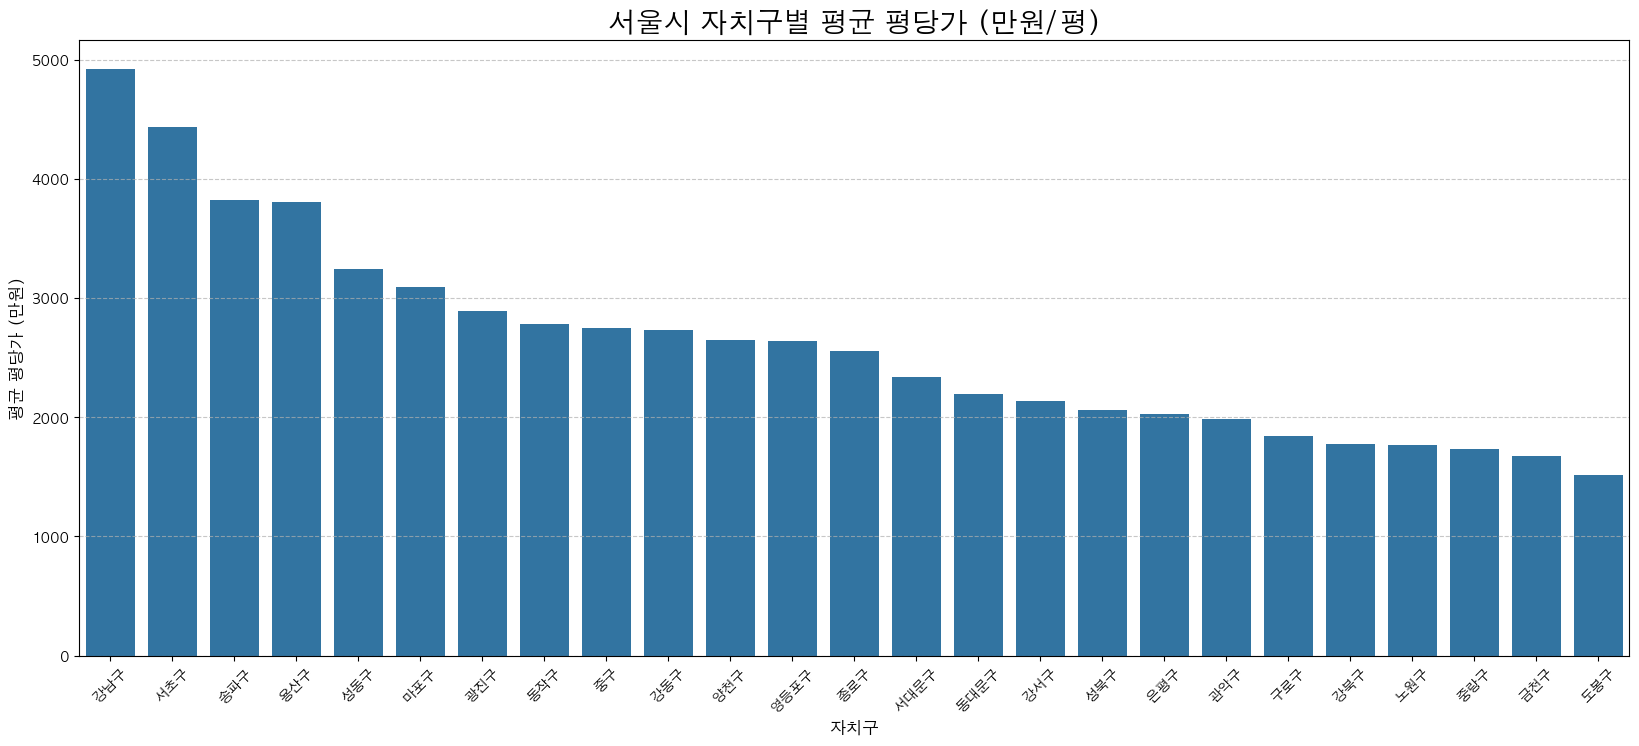


>> [2] 강남구의 동별 평균 평당가를 계산합니다...


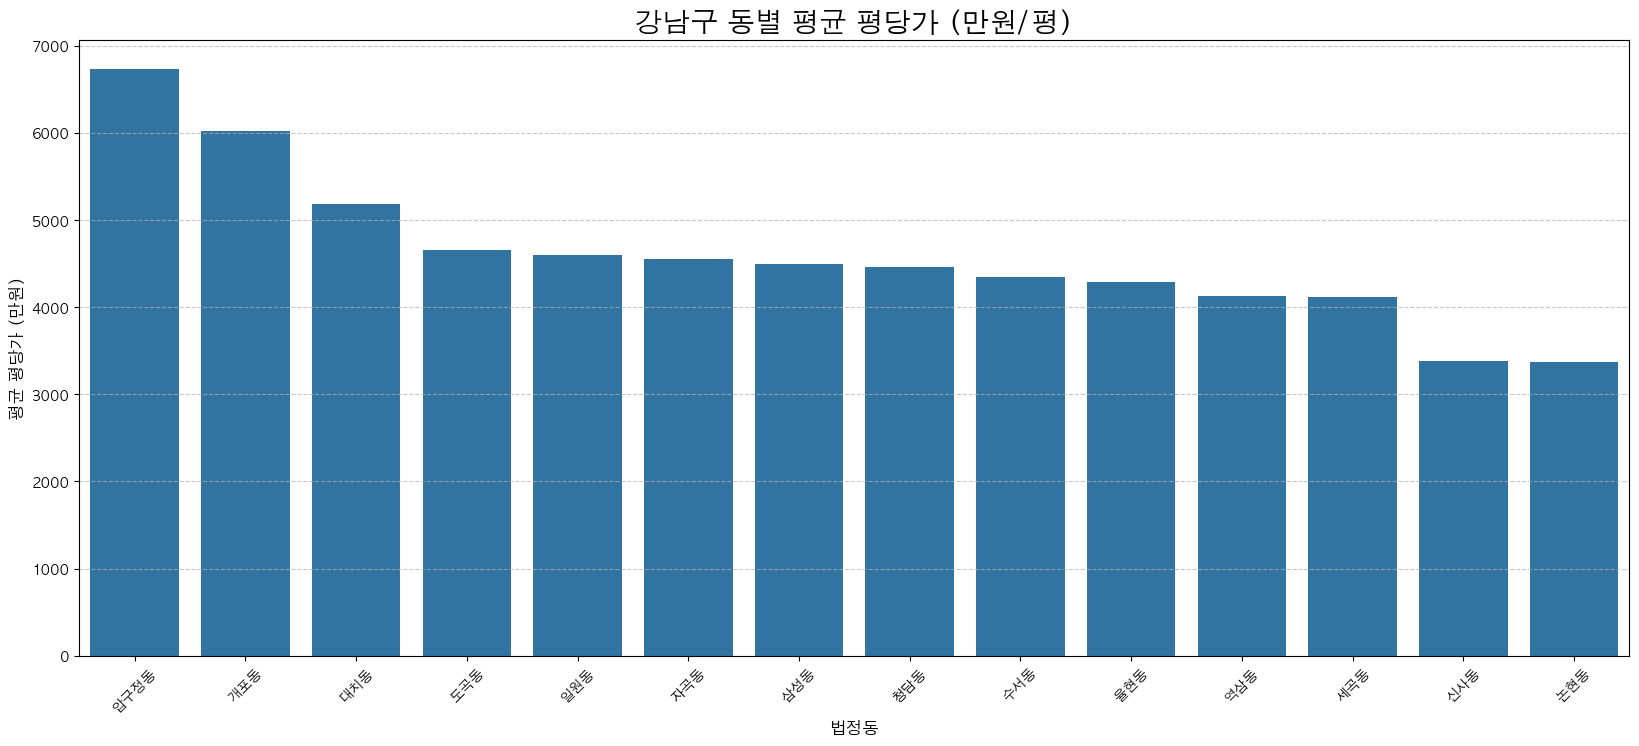

In [5]:
# --- 10. 탐색적 데이터 분석 (EDA) 및 시각화 ---
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 한글 폰트 설정 (Mac OS 기준)
# 만약 Windows를 사용하신다면, 'AppleGothic' 대신 'Malgun Gothic' 등을 사용해야 합니다.
plt.rc('font', family='AppleGothic')
# 마이너스 부호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

print("--- [12] 탐색적 데이터 분석 (EDA) 시작 ---")

# [1] 서울시 자치구별 평균 평당가 분석 및 시각화
print("\n>> [1] 서울시 자치구별 평균 평당가를 계산합니다...")

# 'sggNm'으로 그룹화하여 'price_per_pyeong'의 평균을 계산하고, 높은 순으로 정렬합니다.
sgg_price_mean = df_cleaned.groupby('sggNm')['price_per_pyeong'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(20, 8)) # 그래프 크기 설정
sns.barplot(x=sgg_price_mean.index, y=sgg_price_mean.values)
plt.title('서울시 자치구별 평균 평당가 (만원/평)', fontsize=20)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('평균 평당가 (만원)', fontsize=12)
plt.xticks(rotation=45) # x축 라벨 45도 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# [2] 특정 자치구(강남구)의 동별 평균 평당가 분석 및 시각화
print("\n>> [2] 강남구의 동별 평균 평당가를 계산합니다...")
target_sgg = '강남구'
gangnam_df = df_cleaned[df_cleaned['sggNm'] == target_sgg]

# 'umdNm'(동)으로 그룹화하여 'price_per_pyeong'의 평균을 계산하고, 높은 순으로 정렬합니다.
gangnam_dong_price_mean = gangnam_df.groupby('umdNm')['price_per_pyeong'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(20, 8))
sns.barplot(x=gangnam_dong_price_mean.index, y=gangnam_dong_price_mean.values)
plt.title(f'{target_sgg} 동별 평균 평당가 (만원/평)', fontsize=20)
plt.xlabel('법정동', fontsize=12)
plt.ylabel('평균 평당가 (만원)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [6]:
# --- 11. 추가 피처 엔지니어링 ---

print("--- [13] 추가 피처 엔지니어링 시작 ---")

# [1] 동별 평균 평당가 피처 생성
# 각 데이터가 속한 '동'의 평균적인 시세를 나타내는 피처입니다.
# 모델이 특정 거래의 가격을 예측할 때, 그 동네의 평균적인 가격 수준을 정보로 활용할 수 있게 됩니다.
# transform 함수는 그룹별 계산 결과를 원래 데이터프레임의 인덱스에 맞게 반환해줍니다.
dong_avg_price = df_cleaned.groupby('umdNm')['price_per_pyeong'].transform('mean').round(2)
df_cleaned['dong_avg_price'] = dong_avg_price

print("✅ 'dong_avg_price' (동별 평균 평당가) 컬럼 생성 완료")
display(df_cleaned[['sggNm', 'umdNm', 'price_per_pyeong', 'dong_avg_price']].head())



--- [13] 추가 피처 엔지니어링 시작 ---
✅ 'dong_avg_price' (동별 평균 평당가) 컬럼 생성 완료


,sggNm,umdNm,price_per_pyeong,dong_avg_price
0,종로구,무악동,1496.10,2893.56
1,종로구,창신동,963.94,1820.52
2,종로구,무악동,1322.32,2893.56
3,종로구,창신동,794.68,1820.52
4,종로구,창신동,868.15,1820.52


In [7]:
# --- 12. 전월세 데이터 탐색 ---

print("\n\n--- [14] 전월세 데이터 불러오기 및 탐색 시작 ---")

# [1] 전월세 데이터 샘플 불러오기
# 전체 데이터를 불러오기 전에, 먼저 테이블의 구조를 파악하기 위해 상위 5개 데이터만 가져옵니다.
table_name_jeonse = "raw_apt_jeonse"
query_jeonse_sample = f'SELECT * FROM {DB_SCHEMA}."{table_name_jeonse}" LIMIT 5'

print(f"\n>> 테이블 '{table_name_jeonse}'의 샘플 데이터를 불러옵니다...")

try:
    with engine.connect() as connection:
        df_jeonse_sample = pd.read_sql(query_jeonse_sample, connection)
    
    print("✅ 전월세 데이터 샘플 불러오기 성공!")
    print("\n--- [15] 전월세 데이터 샘플 확인 (head) ---")
    display(df_jeonse_sample)
    
    print("\n--- [16] 전월세 데이터 컬럼 확인 ---")
    print("컬럼 목록:", df_jeonse_sample.columns.tolist())

except Exception as e:
    print(f"❌ 전월세 데이터 불러오기 실패: {e}")
    df_jeonse_sample = pd.DataFrame()





--- [14] 전월세 데이터 불러오기 및 탐색 시작 ---

>> 테이블 'raw_apt_jeonse'의 샘플 데이터를 불러옵니다...
✅ 전월세 데이터 샘플 불러오기 성공!

--- [15] 전월세 데이터 샘플 확인 (head) ---


,sggCd,umdNm,aptNm,jibun,excluUseAr,dealYear,dealMonth,dealDay,deposit,monthlyRent,floor,buildYear,contractTerm,contractType,useRRRight,preDeposit,preMonthlyRent
0,11110,사직동,광화문스페이스본(101동~105동),9,70.8,2011,1,3,"30,000",0,12,2008,None,None,None,None,None
1,11110,창신동,MID그린(1동),601,59.55,2011,1,6,"12,000",0,3,2002,None,None,None,None,None
2,11110,숭인동,숭인모범102동,569-5,59.8,2011,1,10,"1,000",40,4,2000,None,None,None,None,None
3,11110,숭인동,숭인모범102동,569-5,59.8,2011,1,10,"6,500",40,4,2000,None,None,None,None,None
4,11110,사직동,광화문스페이스본(101동~105동),9,70.8,2011,1,7,"32,000",0,2,2008,None,None,None,None,None



--- [16] 전월세 데이터 컬럼 확인 ---
컬럼 목록: ['sggCd', 'umdNm', 'aptNm', 'jibun', 'excluUseAr', 'dealYear', 'dealMonth', 'dealDay', 'deposit', 'monthlyRent', 'floor', 'buildYear', 'contractTerm', 'contractType', 'useRRRight', 'preDeposit', 'preMonthlyRent']


In [12]:
# --- 13. 전월세 데이터 전체 처리 (정제 및 피처 엔지니어링) ---

print("--- [17] 전월세 데이터 전체 처리 시작 ---")

# [1] 전월세 전체 데이터 불러오기
table_name_jeonse = "raw_apt_jeonse"
query_jeonse = f'SELECT * FROM {DB_SCHEMA}."{table_name_jeonse}"'
print(f"\n>> 테이블 '{table_name_jeonse}'의 전체 데이터를 불러옵니다...")

try:
    with engine.connect() as connection:
        df_jeonse = pd.read_sql(query_jeonse, connection)
    print(f"✅ 전월세 데이터 {len(df_jeonse)}개 불러오기 성공!")
except Exception as e:
    print(f"❌ 전월세 데이터 불러오기 실패: {e}")
    df_jeonse = pd.DataFrame()

# [2] 데이터 정제 및 타입 변환
if not df_jeonse.empty:
    df_jeonse_cleaned = df_jeonse.copy() # 원본 보존을 위해 복사

    # [사용자 피드백 반영] 분석에 중요한 컬럼을 보존하고, 불필요한 컬럼만 삭제
    # 'contractTerm', 'preDeposit', 'preMonthlyRent'는 분석을 위해 보존합니다.
    drop_cols = ['contractType', 'useRRRight'] 
    df_jeonse_cleaned = df_jeonse_cleaned.drop(columns=drop_cols)
    print(f"\n>> 불필요한 컬럼 {len(drop_cols)}개 삭제 완료")

    # 쉼표 제거 및 숫자형 변환 대상 컬럼 (종전 임대료/보증금 추가)
    cols_to_process = {
        'deposit': 'int',
        'monthlyRent': 'int',
        'excluUseAr': 'float',
        'buildYear': 'int',
        'dealYear': 'int',
        'dealMonth': 'int',
        'dealDay': 'int',
        'floor': 'int',
        'preDeposit': 'int',
        'preMonthlyRent': 'int'
    }

    for col, col_type in cols_to_process.items():
        if df_jeonse_cleaned[col].dtype == 'object':
            df_jeonse_cleaned[col] = df_jeonse_cleaned[col].str.replace(',', '').str.strip()
        # errors='coerce'를 통해 변환 중 발생하는 에러를 NaN으로 처리하므로, 결측치가 있는 컬럼도 안전하게 변환 가능
        df_jeonse_cleaned[col] = pd.to_numeric(df_jeonse_cleaned[col], errors='coerce')
    
    print(">> 주요 컬럼 숫자 타입 변환 완료")

    # [3] 피처 엔지니어링
    # rent_type 생성 (월세가 0이면 '전세', 아니면 '월세')
    df_jeonse_cleaned['rent_type'] = df_jeonse_cleaned['monthlyRent'].apply(lambda x: '전세' if x == 0 else '월세')
    print(">> 'rent_type' 컬럼 생성 완료")
    
    # deal_datetime 생성
    df_jeonse_cleaned['deal_datetime'] = pd.to_datetime(
        df_jeonse_cleaned['dealYear'].astype(str) + '-' +
        df_jeonse_cleaned['dealMonth'].astype(str).str.zfill(2) + '-' +
        df_jeonse_cleaned['dealDay'].astype(str).str.zfill(2),
        errors='coerce'
    )
    print(">> 'deal_datetime' 컬럼 생성 완료")

    # sggNm 생성
    df_jeonse_cleaned['sggCd'] = df_jeonse_cleaned['sggCd'].astype(int)
    df_jeonse_cleaned['sggNm'] = df_jeonse_cleaned['sggCd'].map(sgg_map)
    print(">> 'sggNm' 컬럼 생성 완료")

    # 환산 평당 보증금 (price_per_pyeong_jeonse) 생성
    # 월세는 '전월세 전환율' 5%를 가정하여 보증금으로 환산합니다. 환산보증금 = 보증금 + (월세 * 12 / 0.05)
    conversion_rate = 0.05
    # 월세가 0(전세)이거나 NaN인 경우 변환하지 않도록 처리
    import numpy as np
    converted_deposit = np.where(
        (df_jeonse_cleaned['monthlyRent'] > 0) & (df_jeonse_cleaned['monthlyRent'].notna()),
        df_jeonse_cleaned['deposit'] + (df_jeonse_cleaned['monthlyRent'] * 12 / conversion_rate),
        df_jeonse_cleaned['deposit']
    )
    df_jeonse_cleaned['price_per_pyeong_jeonse'] = (pd.Series(converted_deposit) / (df_jeonse_cleaned['excluUseAr'] / 3.3058)).round(2)
    print(">> 'price_per_pyeong_jeonse' (환산 평당 보증금) 컬럼 생성 완료")
    
    # 동별 평균 환산 평당 보증금 (dong_avg_price_jeonse) 생성
    dong_avg_price_jeonse = df_jeonse_cleaned.groupby('umdNm')['price_per_pyeong_jeonse'].transform('mean').round(2)
    df_jeonse_cleaned['dong_avg_price_jeonse'] = dong_avg_price_jeonse
    print(">> 'dong_avg_price_jeonse' (동별 평균 환산 평당 보증금) 컬럼 생성 완료")
    
    # --- 14. 전월세 데이터 처리 결과 확인 ---
    print("\n--- [18] 전월세 데이터 처리 결과 (head) ---")
    display(df_jeonse_cleaned[[
        'sggNm', 'umdNm', 'rent_type', 'deposit', 'monthlyRent', 
        'price_per_pyeong_jeonse', 'contractTerm', 'preDeposit', 'preMonthlyRent'
    ]].head())
    
    print("\n--- [19] 전월세 데이터 처리 후 정보 (info) ---")
    df_jeonse_cleaned.info()





--- [17] 전월세 데이터 전체 처리 시작 ---

>> 테이블 'raw_apt_jeonse'의 전체 데이터를 불러옵니다...
✅ 전월세 데이터 2810171개 불러오기 성공!

>> 불필요한 컬럼 2개 삭제 완료
>> 주요 컬럼 숫자 타입 변환 완료
>> 'rent_type' 컬럼 생성 완료
>> 'deal_datetime' 컬럼 생성 완료
>> 'sggNm' 컬럼 생성 완료
>> 'price_per_pyeong_jeonse' (환산 평당 보증금) 컬럼 생성 완료
>> 'dong_avg_price_jeonse' (동별 평균 환산 평당 보증금) 컬럼 생성 완료

--- [18] 전월세 데이터 처리 결과 (head) ---


,sggNm,umdNm,rent_type,deposit,monthlyRent,price_per_pyeong_jeonse,contractTerm,preDeposit,preMonthlyRent
0,종로구,사직동,전세,30000,0,1400.76,None,NaN,NaN
1,종로구,창신동,전세,12000,0,666.16,None,NaN,NaN
2,종로구,숭인동,월세,1000,40,585.98,None,NaN,NaN
3,종로구,숭인동,월세,6500,40,890.02,None,NaN,NaN
4,종로구,사직동,전세,32000,0,1494.15,None,NaN,NaN



--- [19] 전월세 데이터 처리 후 정보 (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810171 entries, 0 to 2810170
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sggCd                    int64         
 1   umdNm                    object        
 2   aptNm                    object        
 3   jibun                    object        
 4   excluUseAr               float64       
 5   dealYear                 int64         
 6   dealMonth                int64         
 7   dealDay                  int64         
 8   deposit                  int64         
 9   monthlyRent              int64         
 10  floor                    float64       
 11  buildYear                int64         
 12  contractTerm             object        
 13  preDeposit               float64       
 14  preMonthlyRent           float64       
 15  rent_type                object        
 16  deal_datetime            datetime64

In [14]:
# --- 15. contractTerm (계약기간) 전처리 ---
print("--- [20] contractTerm (계약기간) 전처리 시작 ---")

# 'contractTerm'에 값이 있고, '~'를 포함하는 유효한 데이터만 대상으로 작업합니다.
valid_terms_mask = df_jeonse_cleaned['contractTerm'].notna() & df_jeonse_cleaned['contractTerm'].str.contains('~')

# ~를 기준으로 start와 end를 분리합니다.
# .str.split()은 Series를 반환하므로, expand=True로 두 개의 컬럼으로 된 DataFrame을 만듭니다.
contract_dates = df_jeonse_cleaned.loc[valid_terms_mask, 'contractTerm'].str.split('~', expand=True)

# 시작일과 종료일 처리
# 'YY.MM' 형식을 '20YY-MM-01' 형식의 datetime으로 변환합니다.
# 날짜가 없는 경우 월의 시작일(1일)로 설정합니다.
start_date_str = '20' + contract_dates[0].str.replace('.', '-', regex=False)
end_date_str = '20' + contract_dates[1].str.replace('.', '-', regex=False)

# pd.to_datetime으로 datetime 객체로 변환합니다. 변환 불가능한 값은 NaT(결측치)로 처리합니다.
start_dates = pd.to_datetime(start_date_str, errors='coerce')
end_dates = pd.to_datetime(end_date_str, errors='coerce')

# 새로운 컬럼으로 df_jeonse_cleaned에 추가합니다.
# .loc을 사용하여 유효한 데이터(valid_terms_mask)가 있는 행에만 값을 할당합니다.
df_jeonse_cleaned.loc[valid_terms_mask, 'contract_start_date'] = start_dates
df_jeonse_cleaned.loc[valid_terms_mask, 'contract_end_date'] = end_dates

print("✅ 'contract_start_date' 및 'contract_end_date' 컬럼 생성 완료")


# --- 16. 계약기간 처리 결과 확인 ---
print("\n--- [21] 계약기간 처리 결과 샘플 (결측치 제외) ---")
# 변환이 잘 되었는지, 원본과 함께 실제 값이 있는 데이터만 샘플로 확인합니다.
display(df_jeonse_cleaned[df_jeonse_cleaned['contract_start_date'].notna()][[
    'contractTerm', 'contract_start_date', 'contract_end_date'
]].head())



--- [20] contractTerm (계약기간) 전처리 시작 ---
✅ 'contract_start_date' 및 'contract_end_date' 컬럼 생성 완료

--- [21] 계약기간 처리 결과 샘플 (결측치 제외) ---


,contractTerm,contract_start_date,contract_end_date
17,11.03~13.03,2011-03-01,2013-03-01
50,11.03~13.03,2011-03-01,2013-03-01
61,11.02~13.02,2011-02-01,2013-02-01
69,11.02~13.02,2011-02-01,2013-02-01
126,11.01~13.01,2011-01-01,2013-01-01


In [23]:
# --- 17. 최종 피처 엔지니어링 Ver.3 (시장 완전 분리) ---
print("--- [22] 최종 피처 엔지니어링: 세 가지 시장 특성 완전 분리 ---")
import numpy as np

# --- 1. '전세 시장' 분석: 평당 전세가 기준 ---
df_jeonse_only = df_jeonse_cleaned[df_jeonse_cleaned['rent_type'] == '전세'].copy()
df_jeonse_only['price_per_pyeong_jeonse'] = (df_jeonse_only['deposit'] / (df_jeonse_only['excluUseAr'] / 3.3058)).round(2)
sgg_avg_pp_jeonse = df_jeonse_only.groupby('sggNm')['price_per_pyeong_jeonse'].mean().round(2)
dong_avg_pp_jeonse = df_jeonse_only.groupby('umdNm')['price_per_pyeong_jeonse'].mean().round(2)
print("✅ [전세 시장] 구별/동별 '평당 전세가' 계산 완료")


# --- 2. '월세 시장' 분석 ---
df_wolse_only = df_jeonse_cleaned[df_jeonse_cleaned['rent_type'] == '월세'].copy()
# 2-1. [월세 시장 - 보증금 편] 평당 월세 보증금 기준
df_wolse_only['price_per_pyeong_wolse_deposit'] = (df_wolse_only['deposit'] / (df_wolse_only['excluUseAr'] / 3.3058)).round(2)
sgg_avg_pp_wolse_deposit = df_wolse_only.groupby('sggNm')['price_per_pyeong_wolse_deposit'].mean().round(2)
dong_avg_pp_wolse_deposit = df_wolse_only.groupby('umdNm')['price_per_pyeong_wolse_deposit'].mean().round(2)
print("✅ [월세 시장] 구별/동별 '평당 월세 보증금' 계산 완료")
# 2-2. [월세 시장 - 월세 편] 평균 월세 기준
sgg_avg_monthly_rent = df_wolse_only.groupby('sggNm')['monthlyRent'].mean().round(2)
dong_avg_monthly_rent = df_wolse_only.groupby('umdNm')['monthlyRent'].mean().round(2)
print("✅ [월세 시장] 구별/동별 '평균 월세' 계산 완료")


# --- 3. [핵심] 계산된 피처들을 'rent_type'에 맞게 '분리'하여 추가 ---
# 3-1. 먼저 6개의 새로운 컬럼을 모두 빈칸(NaN)으로 생성합니다.
new_feature_cols = [
    'sgg_avg_pp_jeonse', 'dong_avg_pp_jeonse',
    'sgg_avg_pp_wolse_deposit', 'dong_avg_pp_wolse_deposit',
    'sgg_avg_monthly_rent', 'dong_avg_monthly_rent'
]
for col in new_feature_cols:
    df_jeonse_cleaned[col] = np.nan

# 3-2. '전세' 데이터에만 '전세' 관련 피처 값을 채워넣습니다.
jeonse_mask = df_jeonse_cleaned['rent_type'] == '전세'
df_jeonse_cleaned.loc[jeonse_mask, 'sgg_avg_pp_jeonse'] = df_jeonse_cleaned.loc[jeonse_mask, 'sggNm'].map(sgg_avg_pp_jeonse)
df_jeonse_cleaned.loc[jeonse_mask, 'dong_avg_pp_jeonse'] = df_jeonse_cleaned.loc[jeonse_mask, 'umdNm'].map(dong_avg_pp_jeonse)

# 3-3. '월세' 데이터에만 '월세' 관련 피처 값들을 채워넣습니다.
wolse_mask = df_jeonse_cleaned['rent_type'] == '월세'
df_jeonse_cleaned.loc[wolse_mask, 'sgg_avg_pp_wolse_deposit'] = df_jeonse_cleaned.loc[wolse_mask, 'sggNm'].map(sgg_avg_pp_wolse_deposit)
df_jeonse_cleaned.loc[wolse_mask, 'dong_avg_pp_wolse_deposit'] = df_jeonse_cleaned.loc[wolse_mask, 'umdNm'].map(dong_avg_pp_wolse_deposit)
df_jeonse_cleaned.loc[wolse_mask, 'sgg_avg_monthly_rent'] = df_jeonse_cleaned.loc[wolse_mask, 'sggNm'].map(sgg_avg_monthly_rent)
df_jeonse_cleaned.loc[wolse_mask, 'dong_avg_monthly_rent'] = df_jeonse_cleaned.loc[wolse_mask, 'umdNm'].map(dong_avg_monthly_rent)

print("✅ 6개의 새로운 최종 시장 특성 피처를 'rent_type'에 맞게 완벽히 분리하여 추가 완료")


# --- 4. 최종 결과 확인 ---
print("\n--- [23] 최종 피처 엔지니어링 결과 샘플 ---")
display(df_jeonse_cleaned[[
    'sggNm', 'umdNm', 'rent_type',
    'sgg_avg_pp_jeonse', 'dong_avg_pp_jeonse',
    'sgg_avg_pp_wolse_deposit', 'dong_avg_pp_wolse_deposit',
    'sgg_avg_monthly_rent', 'dong_avg_monthly_rent'
]].sample(10))








--- [22] 최종 피처 엔지니어링: 세 가지 시장 특성 완전 분리 ---
✅ [전세 시장] 구별/동별 '평당 전세가' 계산 완료
✅ [월세 시장] 구별/동별 '평당 월세 보증금' 계산 완료
✅ [월세 시장] 구별/동별 '평균 월세' 계산 완료
✅ 6개의 새로운 최종 시장 특성 피처를 'rent_type'에 맞게 완벽히 분리하여 추가 완료

--- [23] 최종 피처 엔지니어링 결과 샘플 ---


,sggNm,umdNm,rent_type,sgg_avg_pp_jeonse,dong_avg_pp_jeonse,sgg_avg_pp_wolse_deposit,dong_avg_pp_wolse_deposit,sgg_avg_monthly_rent,dong_avg_monthly_rent
1862255,성북구,길음동,월세,NaN,NaN,647.28,685.51,74.47,81.51
2229683,마포구,용강동,전세,2075.30,2716.35,NaN,NaN,NaN,NaN
256516,강서구,염창동,월세,NaN,NaN,676.58,1079.37,58.04,61.77
1794760,동대문구,휘경동,월세,NaN,NaN,684.55,947.61,74.88,56.44
2710852,강서구,가양동,전세,1592.23,1561.50,NaN,NaN,NaN,NaN
1915875,강서구,등촌동,전세,1592.23,1607.48,NaN,NaN,NaN,NaN
1659588,강남구,자곡동,전세,2604.73,2011.29,NaN,NaN,NaN,NaN
924791,서초구,서초동,전세,2621.42,2635.26,NaN,NaN,NaN,NaN
595768,구로구,구로동,월세,NaN,NaN,622.60,481.00,51.51,60.25
1153710,강남구,역삼동,전세,2604.73,3182.39,NaN,NaN,NaN,NaN


--- [25] 시장별 거래량 분석 시작 ---

--- [26] 자치구별 거래량 요약 ---


,매매 거래량,전세 거래량,월세 거래량
sggNm,,,
노원구,141008,152832,72318
송파구,87132,165504,85614
강남구,83094,163909,101923
강서구,80571,119465,48482
강동구,73856,115142,55606
구로구,70269,74109,42886
성북구,68355,73319,33107
양천구,64523,102759,37311
도봉구,62611,54469,23154


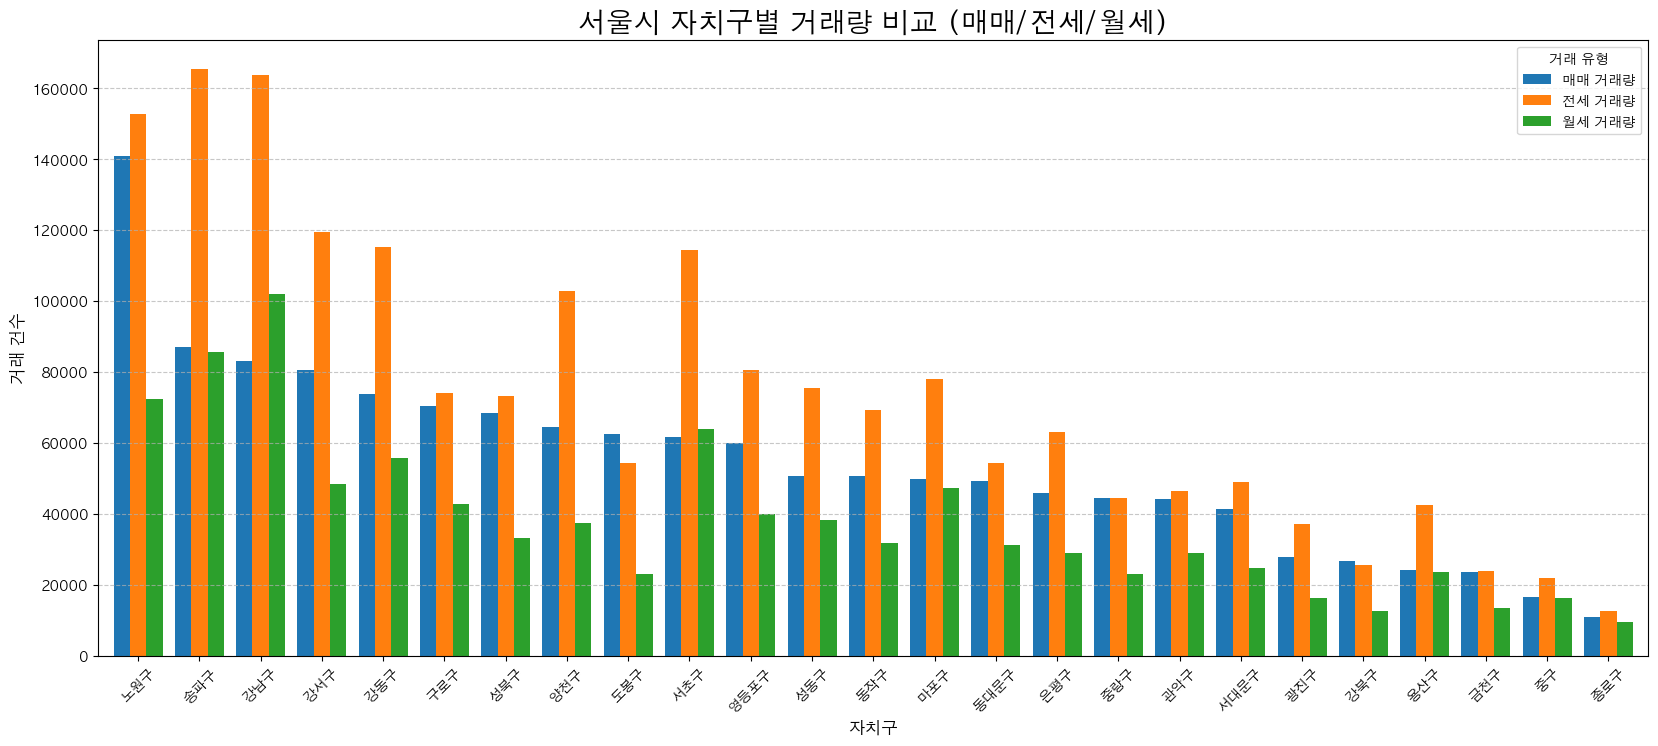

In [25]:
# --- 20. 거래량 분석 및 시각화 ---
print("--- [25] 시장별 거래량 분석 시작 ---")

# [1] 매매, 전세, 월세별 거래량 계산
trade_volume = df_cleaned.groupby('sggNm').size().rename('매매 거래량')
jeonse_volume = df_jeonse_cleaned[df_jeonse_cleaned['rent_type'] == '전세'].groupby('sggNm').size().rename('전세 거래량')
wolse_volume = df_jeonse_cleaned[df_jeonse_cleaned['rent_type'] == '월세'].groupby('sggNm').size().rename('월세 거래량')

# [2] 거래량 데이터 합치기
df_volume = pd.concat([trade_volume, jeonse_volume, wolse_volume], axis=1).fillna(0).astype(int)
df_volume_sorted = df_volume.sort_values(by='매매 거래량', ascending=False)
print("\n--- [26] 자치구별 거래량 요약 ---")
display(df_volume_sorted)


# [3] 거래량 시각화
df_volume_sorted.plot(kind='bar', figsize=(20, 8), width=0.8)
plt.title('서울시 자치구별 거래량 비교 (매매/전세/월세)', fontsize=20)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('거래 건수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='거래 유형')
plt.show()



In [27]:
# --- 21. 갭투자 분석 (2022년 이후, 연도/구/동별 세분화) ---
print("--- [27] 갭투자 심층 분석 시작 (2022년 이후 데이터 대상) ---")

# [1] 분석 데이터 준비 (2022년 이후 데이터만 필터링)
print(">> 2022년 이후 데이터 필터링 중...")
sales_df_filtered = df_cleaned[df_cleaned['deal_datetime'].dt.year >= 2022].copy()
sales_df_filtered['deal_year'] = sales_df_filtered['deal_datetime'].dt.year

jeonse_df_filtered = df_jeonse_cleaned[
    (df_jeonse_cleaned['rent_type'] == '전세') &
    (df_jeonse_cleaned['contract_start_date'].notna()) &
    # 전세 계약 시작일이 2022년 이전이라도 계약 기간이 2022년 이후에 걸쳐있을 수 있으므로,
    # 전세 데이터는 종료일 기준으로 필터링하는 것이 더 정확합니다.
    (df_jeonse_cleaned['contract_end_date'].dt.year >= 2022)
].copy()

# 아파트 특정 키
apartment_key = ['sggNm', 'umdNm', 'jibun', 'aptNm', 'excluUseAr', 'floor']
sales_df_filtered = sales_df_filtered[apartment_key + ['deal_year', 'deal_datetime']].copy()
sales_df_filtered['sale_id'] = range(len(sales_df_filtered)) # 고유 매매 ID

jeonse_df_filtered = jeonse_df_filtered[apartment_key + ['contract_start_date', 'contract_end_date']].copy()

print(f">> 분석 대상 매매 데이터 (2022~): {len(sales_df_filtered)}건")
print(f">> 분석 대상 전세 데이터 (계약종료 2022~): {len(jeonse_df_filtered)}건")


# [2] 연도별/구별/동별 총 매매 건수 집계
total_sales_by_dong = sales_df_filtered.groupby(['deal_year', 'sggNm', 'umdNm']).size().rename('총 매매 건수')


# [3] 데이터 병합 및 갭투자 필터링
print(">> 매매-전세 데이터 병합 및 갭투자 필터링 중... (시간이 소요될 수 있습니다)")
merged_df = pd.merge(sales_df_filtered, jeonse_df_filtered, on=apartment_key, how='inner')

gap_mask = (merged_df['deal_datetime'] >= merged_df['contract_start_date']) & \
           (merged_df['deal_datetime'] <= merged_df['contract_end_date'])

unique_gap_deals = merged_df[gap_mask].drop_duplicates(subset=['sale_id'])
print(f">> 고유 갭투자 매매 건수 (2022~): {len(unique_gap_deals)}건")


# [4] 연도별/구별/동별 갭투자 건수 집계
gap_by_dong = unique_gap_deals.groupby(['deal_year', 'sggNm', 'umdNm']).size().rename('갭투자 건수')


# [5] 최종 결과 집계
gap_summary_by_dong = pd.concat([total_sales_by_dong, gap_by_dong], axis=1).fillna(0).astype(int)
gap_summary_by_dong['갭투자 비율(%)'] = (
    (gap_summary_by_dong['갭투자 건수'] / gap_summary_by_dong['총 매매 건수']) * 100
).round(2)

# 보기 좋게 정렬
gap_summary_final = gap_summary_by_dong.sort_values(
    by=['deal_year', 'sggNm', '갭투자 비율(%)'],
    ascending=[False, True, False]
)

print("\n--- [28] 연도별/자치구별/동별 갭투자 분석 요약 ---")
# 결과가 길 수 있으므로 pandas 옵션 조절
with pd.option_context('display.max_rows', 100):
    display(gap_summary_final)



--- [27] 갭투자 심층 분석 시작 (2022년 이후 데이터 대상) ---
>> 2022년 이후 데이터 필터링 중...
>> 분석 대상 매매 데이터 (2022~): 161029건
>> 분석 대상 전세 데이터 (계약종료 2022~): 544405건
>> 매매-전세 데이터 병합 및 갭투자 필터링 중... (시간이 소요될 수 있습니다)
>> 고유 갭투자 매매 건수 (2022~): 111680건

--- [28] 연도별/자치구별/동별 갭투자 분석 요약 ---


총 매매 건수  갭투자 건수  갭투자 비율(%)
deal_year sggNm umdNm                            
2025      강남구   수서동        217     203      93.55
                일원동        259     227      87.64
                세곡동         98      82      83.67
                자곡동        145     113      77.93
                압구정동       265     199      75.09
...                        ...     ...        ...
2022      중랑구   면목동        100      44      44.00
                중화동         23      10      43.48
                묵동          77      32      41.56
                망우동         41       5      12.20
                상봉동        230      26      11.30

[1231 rows x 3 columns]

--- [29] 갭투자 분석 시각화 시작 ---

--- [30] 연도별/자치구별 갭투자 분석 요약 (시각화용) ---


,deal_year,sggNm,총 매매 건수,갭투자 건수,갭투자 비율(%)
42,2023,송파구,2755,2325,84.39
67,2024,송파구,4316,3612,83.69
33,2023,노원구,2653,2197,82.81
83,2025,노원구,3700,3037,82.08
92,2025,송파구,3966,3238,81.64
...,...,...,...,...,...
2,2022,강북구,275,92,33.45
5,2022,광진구,284,91,32.04
6,2022,구로구,774,245,31.65
22,2022,종로구,172,51,29.65


/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_4658/2151154834.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


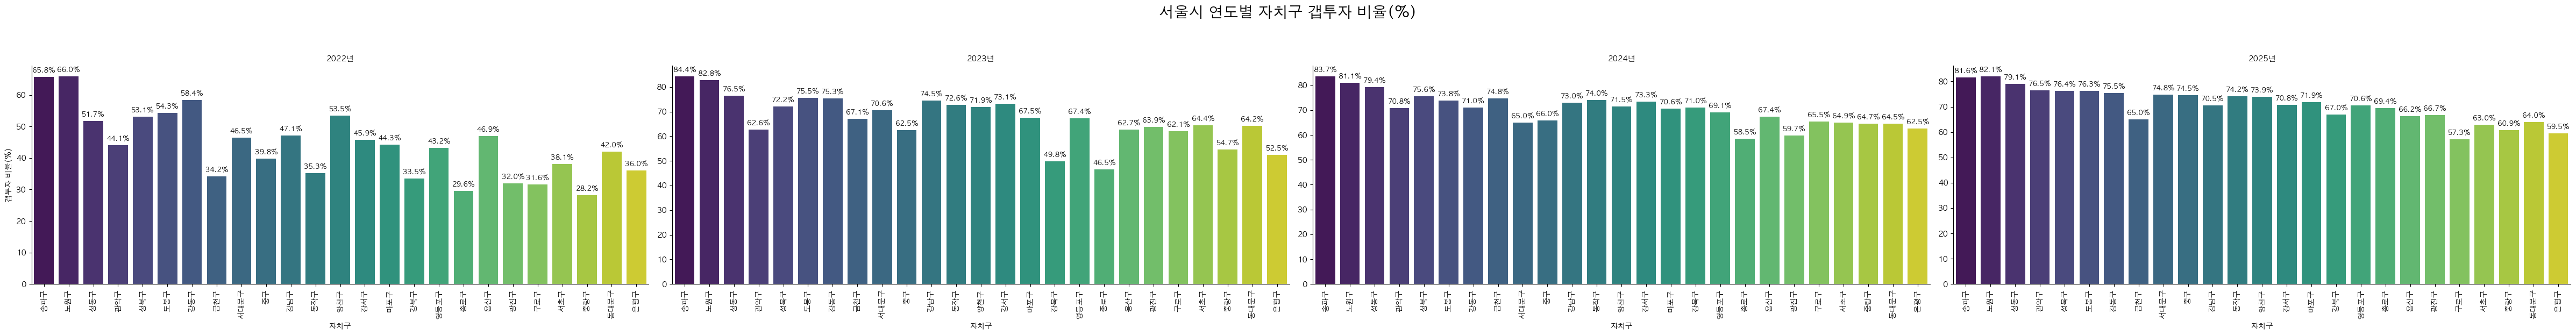


--- [31] '송파구' 동별 갭투자 비율 Top 15 (2025년) ---


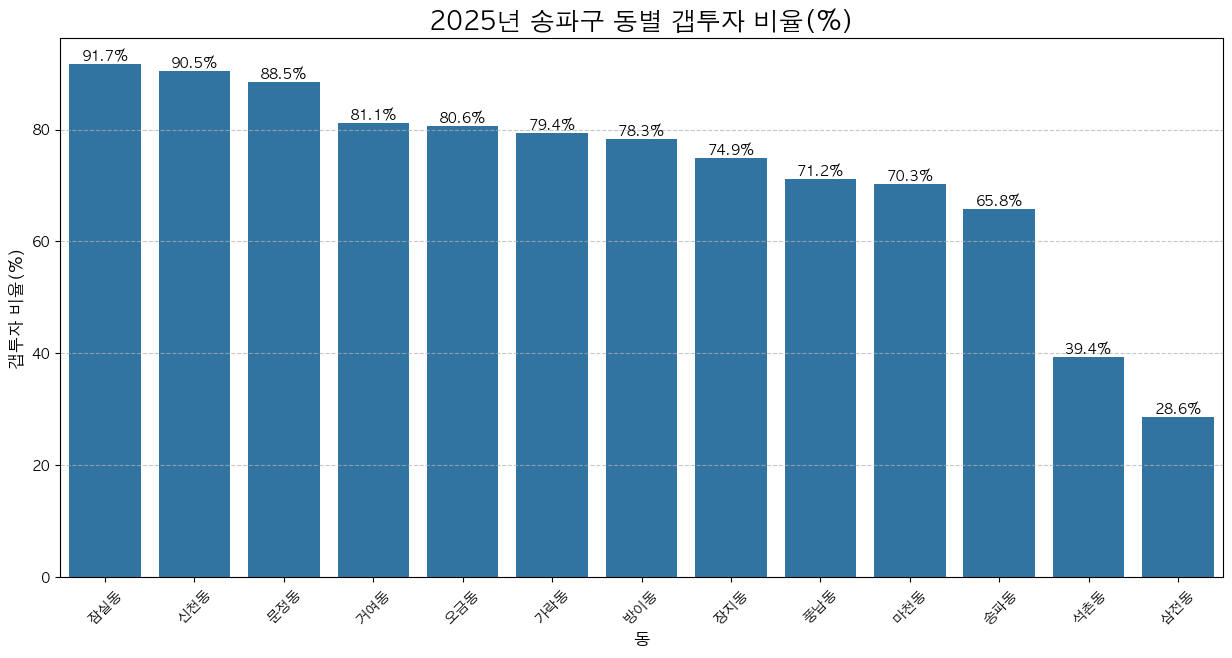

In [28]:
# --- 22. 갭투자 분석 시각화 ---
print("--- [29] 갭투자 분석 시각화 시작 ---")

# 시각화를 진행하기 전에, 분석된 데이터가 있는지 확인합니다.
if 'gap_summary_final' in locals() and not gap_summary_final.empty:
    
    # [1] 시각화를 위한 데이터 재가공 (연도별/자치구별 집계)
    # 동별로 세분화된 데이터를 구별로 합산합니다.
    gap_summary_by_sgg = gap_summary_final.groupby(['deal_year', 'sggNm']).agg({
        '총 매매 건수': 'sum',
        '갭투자 건수': 'sum'
    }).reset_index()

    # 갭투자 비율(%)을 다시 계산합니다.
    gap_summary_by_sgg['갭투자 비율(%)'] = (
        (gap_summary_by_sgg['갭투자 건수'] / gap_summary_by_sgg['총 매매 건수']) * 100
    ).fillna(0).round(2)

    # 갭투자 비율이 높은 순으로 정렬
    gap_summary_by_sgg_sorted = gap_summary_by_sgg.sort_values(by='갭투자 비율(%)', ascending=False)

    print("\n--- [30] 연도별/자치구별 갭투자 분석 요약 (시각화용) ---")
    display(gap_summary_by_sgg_sorted)


    # [2] 연도별 자치구 갭투자 비율 시각화 ([숲 보기])
    # seaborn.catplot을 사용하여 연도별로 subplot을 나눕니다.
    g = sns.catplot(
        data=gap_summary_by_sgg_sorted,
        x='sggNm',
        y='갭투자 비율(%)',
        col='deal_year',
        kind='bar',
        height=6,
        aspect=2,
        palette='viridis',
        sharey=False # y축 범위를 연도별로 다르게 설정
    )

    # 그래프 제목 및 레이블 설정
    g.fig.suptitle('서울시 연도별 자치구 갭투자 비율(%)', y=1.03, fontsize=20)
    g.set_axis_labels("자치구", "갭투자 비율(%)")
    g.set_titles("{col_name}년")
    g.set_xticklabels(rotation=90)

    # 각 막대 위에 비율(%) 텍스트 추가
    for ax in g.axes.flat:
        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.1f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points',
                            fontsize=9)
    
    g.fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


    # [3] 특정 지역의 동별 갭투자 비율 시각화 ([나무 보기] - 드릴다운 예시)
    # 가장 최근 연도의 데이터만 사용
    try:
        latest_year = gap_summary_final.index.get_level_values('deal_year').max()
        
        # 갭투자 건수가 가장 많은 자치구를 자동으로 선택
        target_sgg = gap_summary_by_sgg[gap_summary_by_sgg['deal_year'] == latest_year].sort_values(by='갭투자 건수', ascending=False).iloc[0]['sggNm']
        
        # 특정 연도, 특정 구의 동별 데이터 필터링
        drill_down_df = gap_summary_final.loc[
            (gap_summary_final.index.get_level_values('deal_year') == latest_year) &
            (gap_summary_final.index.get_level_values('sggNm') == target_sgg)
        ]

        # 갭투자 비율이 0보다 큰 동만 선택하고 상위 15개만 정렬해서 보여주기
        drill_down_df = drill_down_df[drill_down_df['갭투자 비율(%)'] > 0].sort_values(by='갭투자 비율(%)', ascending=False).head(15)

        if not drill_down_df.empty:
            print(f"\n--- [31] '{target_sgg}' 동별 갭투자 비율 Top 15 ({latest_year}년) ---")
            
            plt.figure(figsize=(15, 7))
            ax_drill = sns.barplot(
                x=drill_down_df.index.get_level_values('umdNm'),
                y=drill_down_df['갭투자 비율(%)']
            )
            plt.title(f'{latest_year}년 {target_sgg} 동별 갭투자 비율(%)', fontsize=18)
            plt.xlabel('동', fontsize=12)
            plt.ylabel('갭투자 비율(%)', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            # 막대 위에 텍스트 추가
            for p in ax_drill.patches:
                ax_drill.annotate(f'{p.get_height():.1f}%', 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha='center', va='center', 
                                  xytext=(0, 5), 
                                  textcoords='offset points')

            plt.show()
        else:
            print(f"\n--- [31] {latest_year}년 '{target_sgg}'에는 분석된 갭투자 데이터가 없습니다. ---")
            
    except (IndexError, KeyError) as e:
        print(f"\n--- [31] 드릴다운 데이터 없음: {latest_year}년도에 갭투자 분석 데이터가 부족하여 동별 상세 분석을 생략합니다. ({e})")

else:
    print("\n--- [29] 갭투자 분석 데이터가 없어 시각화를 생략합니다. ---")

